In [25]:
from keras.layers.pooling import MaxPooling2D
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
# from keras.preprocessing import sequence
# from keras.layers.embeddings import Embedding

In [26]:
from keras.datasets import  fashion_mnist
(training_images,training_labels),(testing_images,testing_labels)=fashion_mnist.load_data()

In [27]:
print(training_images.shape)
# print("x_test shape",x_test.shape)
# print("y_train shape",y_train.shape)
# print("y_test shape",y_test.shape)

(60000, 28, 28)


0
[[  0   0   0   0   0   0   0   3   1   0   0  48 221 191 199 190 234  13   0   0   1   2   0   1
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  28 233 252 235 193 250 249 233  31   0   0   0   1   0
    0   0   0   0]
 [  0   0   0   0   1   0   0   0  86 185 247 227 227 212 175 247 222 226 255 188  71   0   0   0
    0   0   0   0]
 [  0   0   0   0   1   0  68 203 227 220 213 218 219 237 247 237 220 217 215 219 227 186  49   0
    0   0   0   0]
 [  0   0   0   0   0   7 224 218 208 209 202 211 212 213 191 208 212 210 209 209 206 221 223  14
    0   0   0   0]
 [  0   0   0   0   0 152 231 208 213 221 233 234 216 211 206 211 204 208 210 209 210 208 228 181
    0   0   0   0]
 [  0   0   0   0   0 146 243 210 218 189 148 118 181 224 206 211 210 209 209 211 207 211 239 160
    0   0   0   0]
 [  0   0   0   0   4 112 177 255 214 203 180 188 211 213 206 210 209 207 208 209 205 254 135 127
   21   0   0   0]
 [  0   0   0   0   0 255  95 166 230 223 227 223 214 211 213 

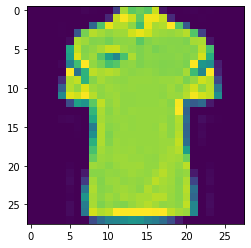

In [28]:
import numpy as np
import matplotlib.pyplot as plt
index=780
np.set_printoptions(linewidth=100)
print(training_labels[index])
print(training_images[index])
plt.imshow(training_images[index])


In [29]:
training_images=training_images/255.0
testing_images=testing_images/255.0
testing_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [30]:
input_shape=(28,28,1)
# create a neural network
model=Sequential()
model.add(Conv2D(16,kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='softmax'))



In [31]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 64)          18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 1, 1, 64)        

In [33]:
model.fit(training_images,training_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0000e+00 - accuracy: 0.1000
Epoch 2/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0000e+00 - accuracy: 0.1000
Epoch 3/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0000e+00 - accuracy: 0.1000
Epoch 4/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0000e+00 - accuracy: 0.1000
Epoch 5/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0000e+00 - accuracy: 0.1000


In [34]:
model.evaluate(testing_images,testing_labels)

313/313 [==============================] - 3s 8ms/step - loss: 0.0000e+00 - accuracy: 0.1000


[0.0, 0.10000000149011612]